### Level Difficulty in Candy Crush Saga.

#### Candy Crush Saga is a hit mobile game developed by King that is played by millions of people all around the world. In this Project, you will get to work with a real Candy Crush dataset and use this data to estimate level difficulty.

1.The dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = 'candy_crush.csv'

data = pd.read_csv(url)
data.head()

,player_id,dt,level,num_attempts,num_success
0,6dd5af4c7228fa353d505767143f5815,2014-01-04,4,3,1
1,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-01,8,4,1
2,c7ec97c39349ab7e4d39b4f74062ec13,2014-01-05,12,6,0
3,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-03,11,1,1
4,a32c5e9700ed356dc8dd5bb3230c5227,2014-01-07,15,6,0


2.Checking the data set

In [11]:
players = data['player_id'].nunique()
levels = data['level'].nunique()
attempts = data['num_attempts'].mean()

print(f'players = {players}\nlevels = {levels}\naverage attempts = {attempts:.2f}')

players = 6814
levels = 15
average attempts = 5.54


3.Computing level difficulty

In [12]:
prob = (data.groupby('level')['num_success'].sum() / data.groupby('level')['num_attempts'].sum()) * 100
prob

level
1     61.875946
2     51.828794
3     42.820181
4     37.242472
5      9.139397
6     41.986172
7     13.566063
8      4.052858
9      8.130081
10    18.799512
11    10.816143
12     9.595224
13    51.695554
14    28.030303
15     3.809179
dtype: float64

4.Plotting difficulty profile

C:\Users\teste\AppData\Local\Temp\ipykernel_8904\898361691.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


[Text(0, 0.0, '0'),
 Text(0, 10.0, '10%'),
 Text(0, 20.0, '20%'),
 Text(0, 30.0, '30%'),
 Text(0, 40.0, '40%'),
 Text(0, 50.0, '50%'),
 Text(0, 60.0, '60%'),
 Text(0, 70.0, '')]

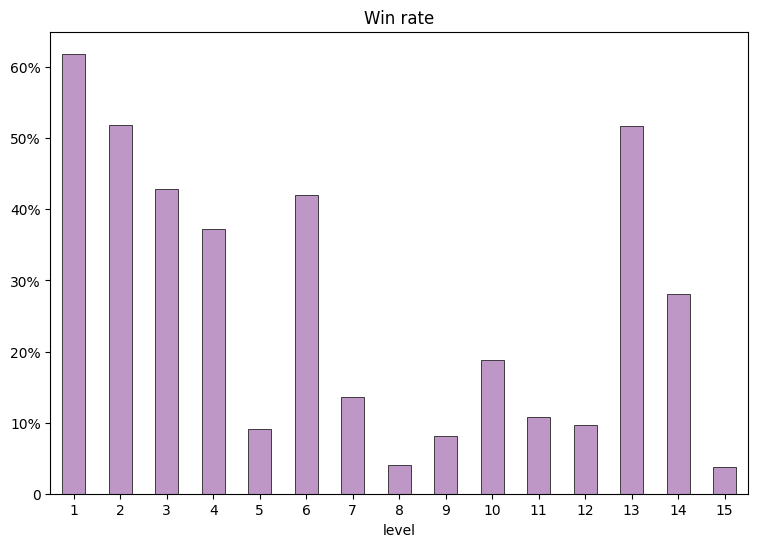

In [13]:
labels = ['0','10%','20%','30%','40%','50%','60%']
fig, ax = plt.subplots(figsize=(9,6))

prob.plot.bar(rot= 0, title= 'Win rate', edgecolor= 'black', linewidth= 0.5, color = '#BE97C6')

ax.set_yticklabels(labels)

5.Spotting hard levels

C:\Users\teste\AppData\Local\Temp\ipykernel_8904\1654506618.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(labels)
C:\Users\teste\AppData\Local\Temp\ipykernel_8904\1654506618.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(labels)


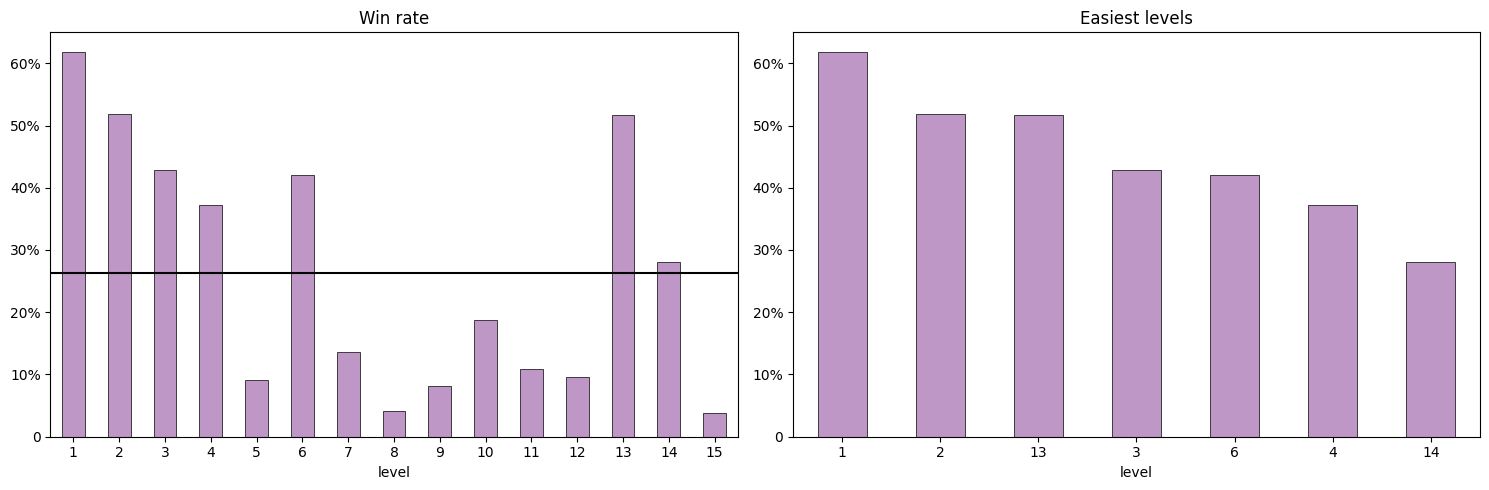

In [14]:
fig, ax = plt.subplots(ncols= 2, figsize=(15,5))

prob.plot.bar(rot= 0, title= 'Win rate', edgecolor= 'black', linewidth= 0.5, color = '#BE97C6',ax= ax[0])

ax[0].axhline(y= prob.mean(), color = 'black')
ax[0].set_yticklabels(labels)

prob[prob > prob.mean()].sort_values(ascending=False).plot.bar(rot= 0,title= 'Easiest levels', edgecolor= 'black', linewidth= 0.5, color = '#BE97C6')
ax[1].set_yticklabels(labels)

plt.tight_layout()

6.Computing uncertainty

In [15]:
prob.sem()

5.148526074493523

7.Showing uncertainty

C:\Users\teste\AppData\Local\Temp\ipykernel_8904\845810081.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


Text(0.5, 1.0, 'Showing uncertainty')

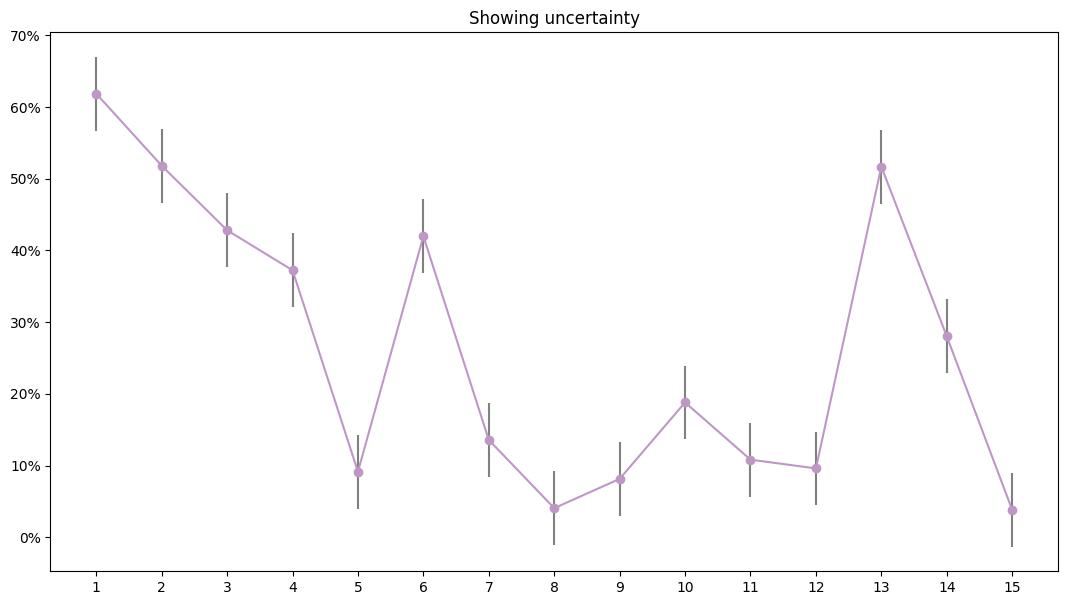

In [117]:
labels = ['','0%','10%','20%','30%','40%','50%','60%','70%']
yerr = prob.sem()
x = np.arange(len(prob)) + 1

fig,ax = plt.subplots(figsize=(13,7))
plt.errorbar(x=x, y=prob, yerr=yerr, color = '#BE97C6', ecolor='gray',fmt='-o')

plt.xticks(x)
ax.set_yticklabels(labels)
plt.title('Showing uncertainty')

8.A final metric

In [115]:
first = data[['num_success','num_attempts']]
first = first[first['num_attempts'] == first['num_success']]
first = first[first['num_attempts'] != 0]


p_win = first.shape[0] / data.shape[0]
p_win

0.19080936851467536